In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules



In [2]:
df = pd.read_excel('Online Retail.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [3]:
# Cau 2
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [19]:
df = df.head(10)
df


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
5 2010-12-01 08:26:00       7.65     17850.0  United Kingdom  
6 2010-12-01 08:26:00       4.25     17850.0  United Kingdom  
7 2010-12-01 08:28:00       1.85     17850.0  United Kingdom  
8 2010-12-01 08:28:00       1.85     17850.0  United Kingdom  
9 2010-12-01 08:34:00       1.69     13047.0  United Kingdom

grouped = df[df['Country'] == 'United Kingdom'].groupby(['InvoiceNo', 'Description']).sum()
grouped

In [5]:
# Cau 3
df[df['InvoiceNo'].str.contains('C', na=False)].head()
df = df[~df['InvoiceNo'].str.contains('C')]

<AxesSubplot:>

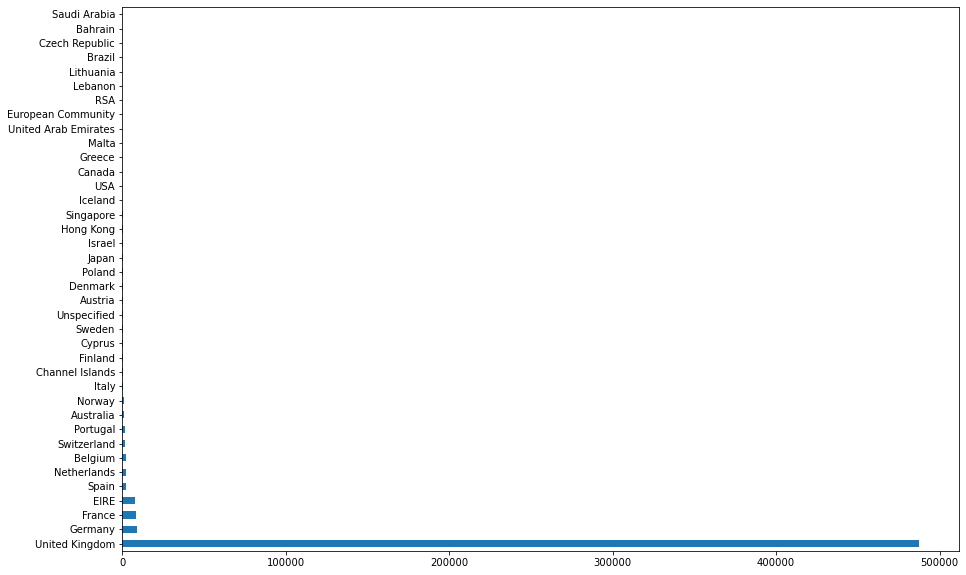

In [6]:
# Cau 4
df['Country'].value_counts().plot(kind='barh', figsize=(15, 10))


In [7]:
# Cau 5
basket = df[df['Country'] == 'United Kingdom'].groupby(['InvoiceNo', 'Description'])['Quantity']

In [8]:
# Cau 6
basket = basket.sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket.head(10)

Description  *Boombox Ipod Classic  *USB Office Mirror Ball  \
InvoiceNo                                                     
536365                         0.0                      0.0   
536366                         0.0                      0.0   
536367                         0.0                      0.0   
536368                         0.0                      0.0   
536369                         0.0                      0.0   
536371                         0.0                      0.0   
536372                         0.0                      0.0   
536373                         0.0                      0.0   
536374                         0.0                      0.0   
536375                         0.0                      0.0   

Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536365                          0.0                         0.0   
536366                          0.0                         0.0   
536367                          0.0                         0.0   
536368                          0.0                         0.0   
536369                          0.0                         0.0   
536371                          0.0                         0.0   
536372                          0.0                         0.0   
536373                          0.0                         0.0   
536374                          0.0                         0.0   
536375                          0.0                         0.0   

Description  12 DAISY PEGS IN WOOD BOX  12 EGG HOUSE PAINTED WOOD  \
InvoiceNo                                                           
536365                             0.0                        0.0   
536366                             0.0                        0.0   
536367                             0.0                        0.0   
536368                             0.0                        0.0   
536369                             0.0                        0.0   
536371                             0.0                        0.0   
536372                             0.0                        0.0   
536373                             0.0                        0.0   
536374                             0.0                        0.0   
536375                             0.0                        0.0   

Description  12 HANGING EGGS HAND PAINTED  12 IVORY ROSE PEG PLACE SETTINGS  \
InvoiceNo                                                                     
536365                                0.0                               0.0   
536366                                0.0                               0.0   
536367                                0.0                               0.0   
536368                                0.0                               0.0   
536369                                0.0                               0.0   
536371                                0.0                               0.0   
536372                                0.0                               0.0   
536373                                0.0                               0.0   
536374                                0.0                               0.0   
536375                                0.0                               0.0   

Description  12 MESSAGE CARDS WITH ENVELOPES  12 PENCIL SMALL TUBE WOODLAND  \
InvoiceNo                                                                     
536365                                   0.0                            0.0   
536366                                   0.0                            0.0   
536367                                   0.0                            0.0   
536368                                   0.0                            0.0   
536369                                   0.0                            0.0   
536371                                   0.0                            0.0   
536372                      